<a href="https://colab.research.google.com/github/tarcisogreco/tarcisogreco/blob/main/Ler_dataset_balanco_energia_10_11_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inserindo url que aponta para o arquivo .csv proveniente do site https://dados.ons.org.br/

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


url_csv = "https://ons-aws-prod-opendata.s3.amazonaws.com/dataset/balanco_energia_subsistema_ho/BALANCO_ENERGIA_SUBSISTEMA_2023.csv"

response = requests.get(url_csv)
if response.status_code == 200:
    print("requisição bem sucedida")
    # Salva o arquivo CSV localmente
    with open("dados.csv", "wb") as arquivo:
        arquivo.write(response.content)

    # Carrega o arquivo CSV para um DataFrame, especificando o sepador
    df = pd.read_csv("dados.csv", sep=';') # Use ';' como separador
    print("verificando variaveis existentes:\n",df.columns) #verificando variaveis existentes
    print("verificando tipos de variaveis:\n",df.dtypes) #verificando tipos de variaveis
    #Renomeando as colunas
    df.columns = ['id_subsistema', 'nom_subsistema', 'din_instante', 'val_gerhidraulica', 'val_gertermica', 'val_gereolica', 'val_gersolar', 'val_carga', 'val_intercambio']
else:
    print("Erro ao baixar")

requisição bem sucedida
verificando variaveis existentes:
 Index(['id_subsistema', 'nom_subsistema', 'din_instante', 'val_gerhidraulica',
       'val_gertermica', 'val_gereolica', 'val_gersolar', 'val_carga',
       'val_intercambio'],
      dtype='object')
verificando tipos de variaveis:
 id_subsistema         object
nom_subsistema        object
din_instante          object
val_gerhidraulica    float64
val_gertermica       float64
val_gereolica        float64
val_gersolar         float64
val_carga            float64
val_intercambio      float64
dtype: object


In [ ]:

#Como algumas variáveis estão com o tipo objeto, temos que converter as variáveis para o tipo apropriado de acordo com o contexto. Ou seja, são dados do balanço de energia do ONS.

numeric_cols = ['val_gerhidraulica', 'val_gertermica', 'val_gereolica', 'val_gersolar', 'val_carga', 'val_intercambio']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert the date column
df['din_instante'] = pd.to_datetime(df['din_instante'])

print("verificando variaveis existentes:\n",df.columns) #verificando variaveis existentes
print("verificando tipos de variaveis:\n",df.dtypes) #verificando tipos de variaveis
df.head(10) #verificando dados

verificando variaveis existentes:
 Index(['id_subsistema', 'nom_subsistema', 'din_instante', 'val_gerhidraulica',
       'val_gertermica', 'val_gereolica', 'val_gersolar', 'val_carga',
       'val_intercambio'],
      dtype='object')
verificando tipos de variaveis:
 id_subsistema                object
nom_subsistema               object
din_instante         datetime64[ns]
val_gerhidraulica           float64
val_gertermica              float64
val_gereolica               float64
val_gersolar                float64
val_carga                   float64
val_intercambio             float64
dtype: object


,id_subsistema,nom_subsistema,din_instante,val_gerhidraulica,val_gertermica,val_gereolica,val_gersolar,val_carga,val_intercambio
0,NE,NORDESTE,2023-01-01 00:00:00,3874.072998,677.062988,13305.261719,1.932000,10455.818,7402.512
1,N,NORTE,2023-01-01 00:00:00,7858.744141,877.854980,211.772003,0.000000,5990.553,2957.818
2,SIN,SISTEMA INTERLIGADO NACIONAL,2023-01-01 00:00:00,39057.309000,5698.335000,14138.750000,21.155000,58904.080,11.470
3,SE,SUDESTE/CENTRO-OESTE,2023-01-01 00:00:00,24661.111328,4071.576904,6.000000,18.223000,32183.885,-3426.974
4,S,SUL,2023-01-01 00:00:00,2663.381104,71.839996,615.716003,1.000000,10273.827,-6921.890
5,NE,NORDESTE,2023-01-01 01:00:00,3374.273926,678.442017,12960.626953,1.013000,10481.710,6532.646
6,N,NORTE,2023-01-01 01:00:00,8261.913086,880.137024,218.951996,0.000000,5981.216,3379.786
7,SIN,SISTEMA INTERLIGADO NACIONAL,2023-01-01 01:00:00,39624.650000,5727.550000,13790.859000,20.258000,59163.320,0.000
8,SE,SUDESTE/CENTRO-OESTE,2023-01-01 01:00:00,24306.152344,4099.463867,5.000000,18.245001,32196.682,-3767.821
9,S,SUL,2023-01-01 01:00:00,3682.311035,69.507004,606.280029,1.000000,10503.709,-6144.611


In [ ]:
#armazenando os valores das colunas em variáveis
sigla_subsistema = df['id_subsistema']
subsistema = df['nom_subsistema']
instante = df['din_instante']
gerhidraulica = df['val_gerhidraulica']
gertermica = df['val_gertermica']
gereolica = df['val_gereolica']
gersolar = df['val_gersolar']
carga = df['val_carga']
intercambio = df['val_intercambio']

#imprimindo os 5 primeiros valores das variaveis para checagem
print("sigla_subsistema:\n", sigla_subsistema.head(5))
print("\nsubsistema:\n", subsistema.head(5))
print("\ninstante:\n", instante.head(5))
print("\ngerhidraulica:\n", gerhidraulica.head(5))
print("\ngertermica:\n", gertermica.head(5))
print("\ngereolica:\n", gereolica.head(5))
print("\ngersolar:\n", gersolar.head(5))
print("\ncarga:\n", carga.head(5))
print("\nintercambio:\n", intercambio.head(5))


sigla_subsistema:
 0     NE
1      N
2    SIN
3     SE
4      S
Name: id_subsistema, dtype: object

subsistema:
 0                        NORDESTE
1                           NORTE
2    SISTEMA INTERLIGADO NACIONAL
3            SUDESTE/CENTRO-OESTE
4                             SUL
Name: nom_subsistema, dtype: object

instante:
 0   2023-01-01
1   2023-01-01
2   2023-01-01
3   2023-01-01
4   2023-01-01
Name: din_instante, dtype: datetime64[ns]

gerhidraulica:
 0     3874.072998
1     7858.744141
2    39057.309000
3    24661.111328
4     2663.381104
Name: val_gerhidraulica, dtype: float64

gertermica:
 0     677.062988
1     877.854980
2    5698.335000
3    4071.576904
4      71.839996
Name: val_gertermica, dtype: float64

gereolica:
 0    13305.261719
1      211.772003
2    14138.750000
3        6.000000
4      615.716003
Name: val_gereolica, dtype: float64

gersolar:
 0     1.932
1     0.000
2    21.155
3    18.223
4     1.000
Name: val_gersolar, dtype: float64

carga:
 0    10455.818


----------------------- 
NE para nordeste
SE para sudeste/centrooeste
N para norte
S para sul
SIN para Sistema Integrado Nacional
Escolha uma sigla: ['NE', 'N', 'SIN', 'SE', 'S'] S
Soma de gerhidraulica para S: 81360453.28017712
Soma de gertermica para S: 9059143.886340229
Soma de gereolica para S: 5797957.19154987
Soma de gersolar para S: 4913914.87822064
Soma total da geração para S: 101131469.23628786
Soma de carga para S: 110086029.61912884


Variável,Valor (MWh)
Geração Hidráulica,"81,360,453.28"
Geração Térmica,"9,059,143.89"
Geração Eólica,"5,797,957.19"
Geração Solar,"4,913,914.88"
Total da Geração,"101,131,469.24"
Carga,"110,086,029.62"


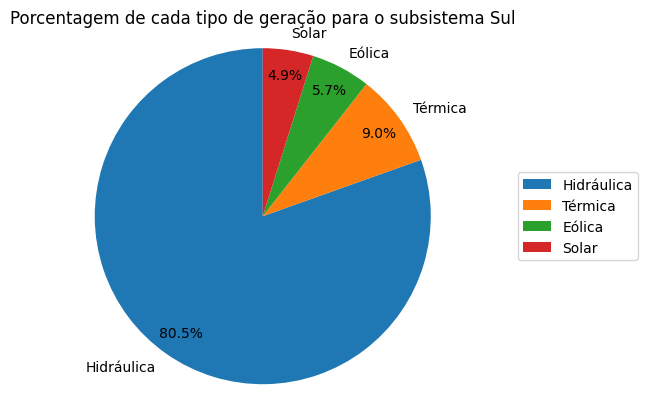

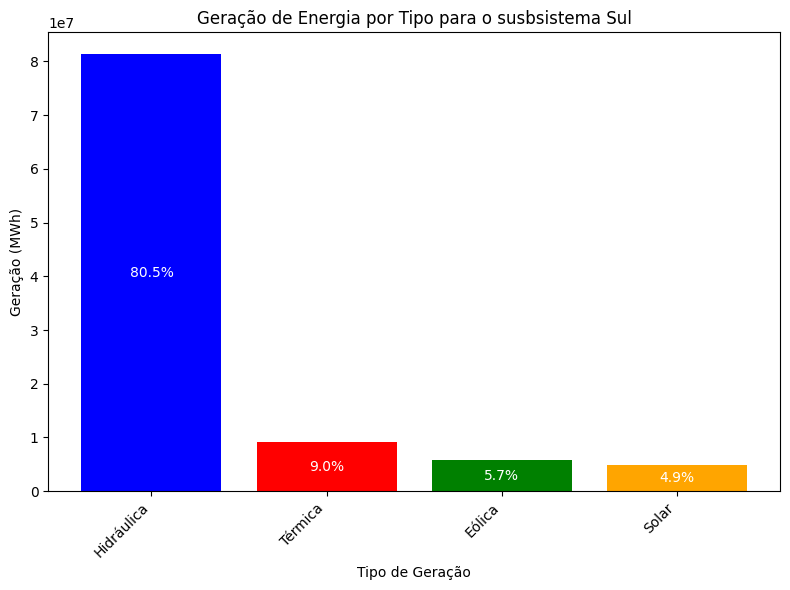

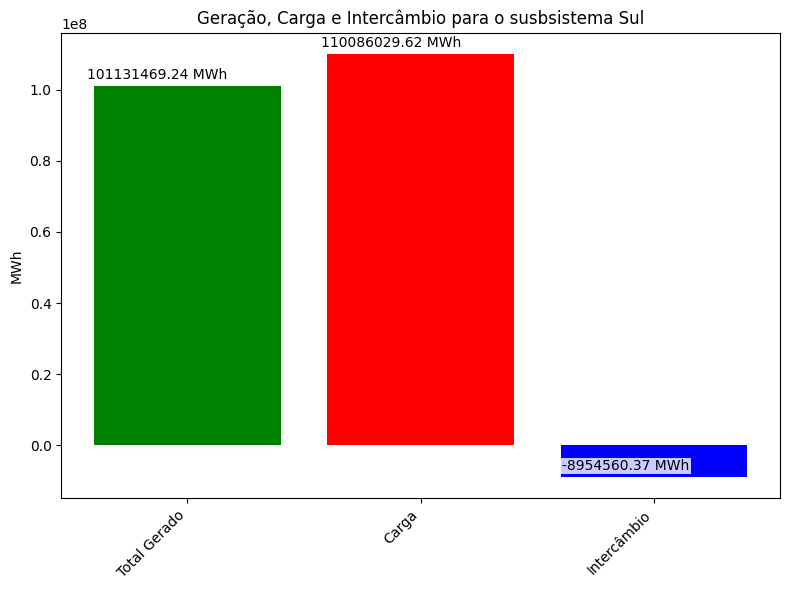

Deseja escolher outra sigla (s/n)? n

Ok, você escolheu sair. Até a próxima!


In [29]:
#Seleção do subsistema realizado pelo usuário

while True:
  # Lista de siglas disponíveis (substitua pelos valores reais)
  siglas_disponiveis = df['id_subsistema'].unique().tolist()

  #imprime o significado das siglas
  print("\n----------------------- ")
  print("NE para nordeste")
  print("SE para sudeste/centrooeste")
  print("N para norte")
  print("S para sul")
  print("SIN para Sistema Integrado Nacional")

  #dicionário para mapear siglas aos nomes dos subsistemas
  siglas_subsistema = {
      'NE': 'Nordeste',
      'SE': 'Sudeste/Centro-Oeste',
      'N': 'Norte',
      'S': 'Sul',
      'SIN': 'Sistema Interligado Nacional'
  }

  # Solicita ao usuário que escolha uma sigla
  sigla_desejada = input(f"Escolha uma sigla: {siglas_disponiveis} ")

  # Verifica se a sigla é válida
  if sigla_desejada not in siglas_disponiveis:
      print("Sigla inválida. Por favor, escolha uma sigla da lista.")
      continue  # Volta para o início do loop

  # Filtra o DataFrame pela sigla desejada
  df_filtrado = df[df['id_subsistema'] == sigla_desejada]

  # Soma os valores das colunas desejadas
  soma_gerhidraulica = df_filtrado['val_gerhidraulica'].sum()
  soma_gertermica = df_filtrado['val_gertermica'].sum()
  soma_gereolica = df_filtrado['val_gereolica'].sum()
  soma_gersolar = df_filtrado['val_gersolar'].sum()
  soma_geracao = soma_gerhidraulica + soma_gertermica + soma_gereolica + soma_gersolar;

  soma_carga = df_filtrado['val_carga'].sum()
  intercambio = df_filtrado['val_intercambio'].sum()

  # Imprime os resultados para checagem
  print(f"Soma de gerhidraulica para {sigla_desejada}: {soma_gerhidraulica}")
  print(f"Soma de gertermica para {sigla_desejada}: {soma_gertermica}")
  print(f"Soma de gereolica para {sigla_desejada}: {soma_gereolica}")
  print(f"Soma de gersolar para {sigla_desejada}: {soma_gersolar}")
  print(f"Soma total da geração para {sigla_desejada}: {soma_geracao}")
  print(f"Soma de carga para {sigla_desejada}: {soma_carga}")

  # Cria um DataFrame com os dados do sistema selecionado
  dados_sistema = {
    'Variável': ['Geração Hidráulica', 'Geração Térmica', 'Geração Eólica', 'Geração Solar', 'Total da Geração', 'Carga'],
    'Valor (MWh)': [soma_gerhidraulica, soma_gertermica, soma_gereolica, soma_gersolar, soma_geracao, soma_carga]
  }
  df_sistema = pd.DataFrame(dados_sistema)

  # Define o estilo da tabela com formatação dos valores
  estilo_tabela = df_sistema.style.set_properties(subset=['Valor (MWh)'], **{'text-align': 'right'}) \
    .format({'Valor (MWh)': '{:,.2f}'}) \
    .set_table_styles([{'selector': 'th', 'props': [('background-color', '#f0f0f5'), ('color', '#333')]}]).hide(axis='index')

  # Exibe a tabela com o estilo definido
  display(estilo_tabela)

  # Dados para o gráfico de pizza
  labels = ['Hidráulica', 'Térmica', 'Eólica', 'Solar']
  sizes = [soma_gerhidraulica, soma_gertermica, soma_gereolica, soma_gersolar]

  # Criar o gráfico de pizza
  plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, labeldistance=1.1)

  # Adicionar um título ao gráfico de acordo com a sigla do subsistema selecionado
  plt.title(f'Porcentagem de cada tipo de geração para o subsistema {siglas_subsistema.get(sigla_desejada)}')

  # Adicionar legenda
  plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5))  # Posição e ajuste da legenda

  # Garantir que o gráfico seja um círculo
  plt.axis('equal')

  # Mostrar o gráfico
  plt.show()

  # Gráfico de Barras - tipo de geração
  plt.figure(figsize=(8, 6))  # Ajusta o tamanho da figura
  bars = plt.bar(labels, sizes, color=['blue', 'red', 'green', 'orange']) # armazena as barras em 'bars'
  plt.title(f'Geração de Energia por Tipo para o susbsistema {siglas_subsistema.get(sigla_desejada)}')
  plt.xlabel('Tipo de Geração')
  plt.ylabel('Geração (MWh)')
  plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
  plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos

  # Adiciona o percentual dentro das barras
  total = sum(sizes) # calcula o total gerado
  for bar, size in zip(bars, sizes):
      percentage = (size / total) * 100 # calcula a porcentagem
      plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
              f'{percentage:.1f}%', ha='center', va='center', color='white') # insere o texto

  plt.show()

  # Dados para o gráfico de barras
  labels = ['Total Gerado', 'Carga', 'Intercâmbio']
  values = [soma_geracao, soma_carga, intercambio]

  # Cria o gráfico de barras - balanço energético
  plt.figure(figsize=(8, 6))
  bars = plt.bar(labels, values, color=['green', 'red', 'blue'])
  plt.title(f'Geração, Carga e Intercâmbio para o susbsistema {siglas_subsistema.get(sigla_desejada)}')
  plt.ylabel('MWh')  # Rótulo do eixo y atualizado
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()

  # Adiciona o valor em cima de cada barra, com unidade GWh, alinhamento centralizado e altura fixa
  # Define um espaçamento para o texto acima da barra
  spacing = max(values) * 0.01  # 1% da altura da barra mais alta

  for bar, value in zip(bars, values):
    # Ajusta a posição horizontal do texto com base no tamanho da string
    text_width = len(f'{value:.2f} GWh')
    x_pos = bar.get_x() + bar.get_width() / 2 - (text_width * 0.008)

    # Calcula a posição vertical do texto acima da barra
    y_pos = bar.get_height() + spacing

    plt.text(x_pos, y_pos,  # Usa altura fixa para o texto
             f'{value:.2f} MWh', ha='center', va='bottom', color='black',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1))
  plt.show()

  # Pergunta se o usuário quer escolher outra sigla ou encerrar
  escolha = input("Deseja escolher outra sigla (s/n)? ")

  if escolha.lower() == 'n':
    print("\nOk, você escolheu sair. Até a próxima!")

    break
